In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from openflexure_microscope.hardware.laser import laser
from openflexure_microscope.hardware.lens import lens
import serial
import time
from IPython.display import clear_output
import matplotlib
from IPython.display import display 
import ipywidgets as widgets 
from ipywidgets import interact, Layout 

import openflexure_microscope.camera.buffcam as buffcam
from scipy.ndimage import gaussian_filter

from scipy.ndimage.measurements import center_of_mass
from scipy.signal import chirp, find_peaks, peak_widths


In [2]:
# open the lens and move it 
serialport = "/dev/ttyUSB0"
serialconnection = serial.Serial(serialport,115200,timeout=1) # Open grbl serial port

print('Initializing Lens 1')
# init lens
lens_1 = lens(serialconnection, lens_id = 1)
laser_1 = laser(serialconnection, laser_id = 1)


Initializing Lens 1


In [3]:
try:
    cap.release()
except:
    print("Nothing to release")

Nothing to release


In [4]:
def gstreamer_pipeline(
    capture_width=640,
    capture_height=480,
    display_width=640,
    display_height=480,
    exposuretime=1,
    framerate=120,
    flip_method=0,
    exposure_comp = 2,
    exposure_time = 10
):
    #gst-launch-1.0 
    # nvarguscamerasrc awblock=true aelock=false  exposuretimerange="100000 100000"  gainrange="1 1" ispdigitalgainrange="1 1"  ! 'video/x-raw(memory:NVMM),width=1920,height=1080,format=NV12' ! nvoverlaysink
    # nvarguscamerasrc awblock=true aelock=false width=(int)640, height=(int)480, exposuretimerange="(int)100000 (int)100000" gainrange="1 1" ispdigitalgainrange="1 1" format=(string)NV12, framerate=(fraction)120/1 ! nvvidconv flip-method=0 ! video/x-raw, width=(int)640, height=(int)480, format=(string)BGRx ! videoconvert ! video/x-raw, format=(string)BGR ! appsinkvideo/x-raw(memory:NVMM), 

    exposuretime = int(exposuretime*100000)
    return (
        'nvarguscamerasrc '
        'exposuretimerange="%d %d" gainrange="1 1" ispdigitalgainrange="1 1" '
        'awblock=true aelock=true '
        '! video/x-raw(memory:NVMM), '
        #"width=(int)%d, height=(int)%d, "
        'width=(int)%d, height=(int)%d, ' #" ##exposurecompensation=-2, aelock=true, "  #exposuretimerange=34000 35873300, 
        "format=(string)NV12, framerate=(fraction)%d/1 ! "
        "nvvidconv flip-method=%d ! "
        "video/x-raw, width=(int)%d, height=(int)%d, format=(string)BGRx ! "
        "videoconvert ! "
        "video/x-raw, format=(string)BGR ! appsink"
        % (
            exposuretime,
            exposuretime,
            capture_width,
            capture_height, 
            framerate,
            flip_method,
            display_width,
            display_height,
        )
    )

# To flip the image, modify the flip_method parameter (0 and 2 are the most common)
height = 240
width = 320 
exposuretime = 1
try:
    if not cap.isOpened():        
        height = 240
        width = 320 
        cap = buffcam.VideoCapture(gstreamer_pipeline(exposuretime=exposuretime,capture_width=width, capture_height = height, display_width=width, display_height=height, flip_method=0))#, cv2.CAP_GSTREAMER)
    else:
        print("Camera is already open")
except: 
    # open if it has not been opened at all..
    print(gstreamer_pipeline(flip_method=0))
    cap = buffcam.VideoCapture(gstreamer_pipeline(capture_width=width, capture_height = height, display_width=width, display_height=height, flip_method=0))#, cv2.CAP_GSTREAMER)


nvarguscamerasrc exposuretimerange="100000 100000" gainrange="1 1" ispdigitalgainrange="1 1" awblock=true aelock=true ! video/x-raw(memory:NVMM), width=(int)640, height=(int)480, format=(string)NV12, framerate=(fraction)120/1 ! nvvidconv flip-method=0 ! video/x-raw, width=(int)640, height=(int)480, format=(string)BGRx ! videoconvert ! video/x-raw, format=(string)BGR ! appsink


In [5]:
# let the camera warm up
for _ in range(20):
    ret_val, img = cap.read()
    print(np.mean(img))
            

6.596163194444444
6.575694444444444
6.631953125
6.598012152777778
6.6056119791666665
6.618736979166667
6.612621527777778
6.5914930555555555
6.598997395833333
6.5753385416666665
6.583424479166666
6.6436545138888885
6.542864583333333
6.616684027777778
6.613771701388889
6.547569444444444
6.585737847222222
6.612291666666667
6.6545182291666665
6.560490451388889


In [4]:
pos_x = 7200
pos_z = 340

lens_1.move(pos_x, "X")
lens_1.move(pos_z, "Z")



In [5]:
slider1 = widgets.IntSlider(value=1000,min=0,max=10000,step=100,description='LensX:',orientation='vertical')

In [6]:
def updatelens1(lensvalX): 
    lens_1.move(lensvalX, "X"); 
def updatelens2(lensvalZ): 
    lens_1.move(lensvalZ, "Z");
    
    
interact(updatelens1, lensvalX = (0,10000))

interactive(children=(IntSlider(value=5000, description='lensvalX', max=10000), Output()), _dom_classes=('widg…

<function __main__.updatelens1(lensvalX)>

In [7]:
interact(updatelens2, lensvalZ = (0,2000))

interactive(children=(IntSlider(value=1000, description='lensvalZ', max=2000), Output()), _dom_classes=('widge…

<function __main__.updatelens2(lensvalZ)>

In [10]:
print(gstreamer_pipeline(flip_method=0))

nvarguscamerasrc exposuretimerange="100000 100000" gainrange="1 1" ispdigitalgainrange="1 1" awblock=true aelock=true ! video/x-raw(memory:NVMM), width=(int)640, height=(int)480, format=(string)NV12, framerate=(fraction)120/1 ! nvvidconv flip-method=0 ! video/x-raw, width=(int)640, height=(int)480, format=(string)BGRx ! videoconvert ! video/x-raw, format=(string)BGR ! appsink


# Super Fast Chip Coupling...

In [11]:
is_display=False

In [12]:
# First locate a reflection at the chip surface
# assume we place the lens at the lower part of the chip where you see good reflection of the spot 
pos_x = 0
pos_z = 0

time.sleep(0)
lens_1.move(pos_x, "X")
lens_1.move(pos_z, "Z")


15.4548046875
Coords: 0, Ratio: 76800


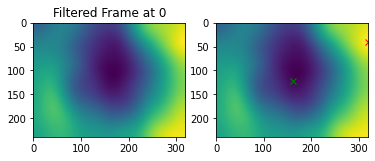

22.358125
Coords: 100, Ratio: 76800


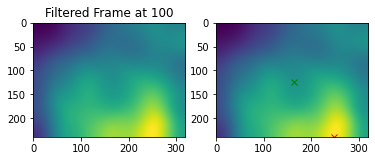

23.694967447916667
Coords: 200, Ratio: 76800


24.430748697916666
Coords: 300, Ratio: 76800


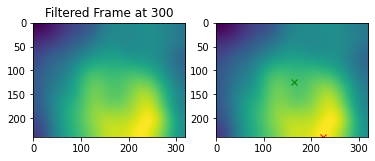

26.061100260416666
Coords: 400, Ratio: 55243


23.987272135416667
Coords: 500, Ratio: 17541


21.058430989583332
Coords: 600, Ratio: 6251


24.200475260416667
Coords: 700, Ratio: 9778


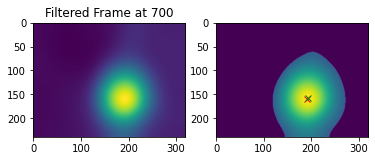

26.4614453125
Coords: 800, Ratio: 43563


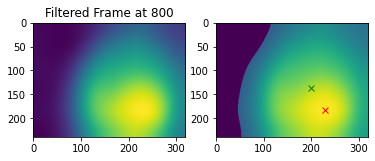

25.5396875
Coords: 900, Ratio: 63137


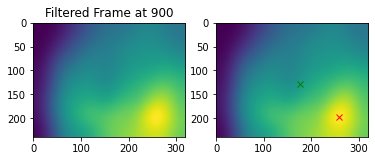

23.753346354166666
Coords: 1000, Ratio: 76302


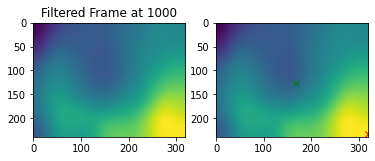

20.606842447916666
Coords: 1100, Ratio: 76800


18.489127604166665
Coords: 1200, Ratio: 76800


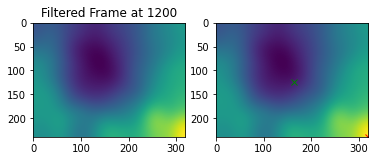

16.899661458333334
Coords: 1300, Ratio: 76800


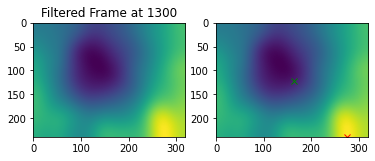

15.001497395833333
Coords: 1400, Ratio: 76800


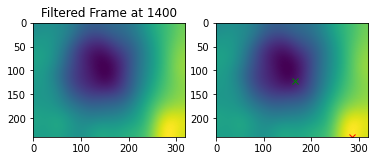

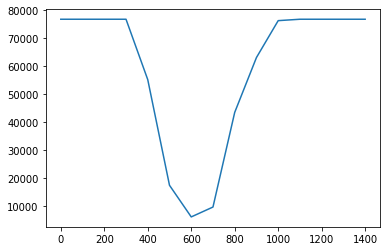

[600]


In [13]:
# NOW perform the first coarse focus of the spot on the reflection

ratios = []

# Capture Frame
stepz = np.array(np.arange(0, 1500, 100))
for iz in stepz:
    lens_1.move(iz, "Z")
    time.sleep(.2)
    _, img = cap.read() 

    # only take green and blue channel to avoid oversaturation
    img = np.mean(img[:,:,1:],-1)
    
    # let the camera warm up
    print(np.mean(img))
    img_filtered = gaussian_filter(img, 20)
    #circles = cv2.HoughCircles(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.HOUGH_GRADIENT, 1.2, 100)
    max_coords = np.where(np.max(img_filtered)==img_filtered)
    img_masked = img_filtered*(img_filtered>np.max(img_filtered)*.3)
    max_coords_COF = center_of_mass(img_masked)
    ratio = np.sum(img_filtered>np.max(img_filtered)*.5) # if its smaller, it is more focussed
    ratios.append(ratio)
    print("Coords: "+str(iz)+", Ratio: "+str(ratio)) 
    if(1):
        plt.subplot(121)
        plt.title('Filtered Frame at '+str(iz))
        plt.imshow(img_filtered)
        plt.subplot(122)
        plt.imshow(img_masked)    
        plt.plot(max_coords[1], max_coords[0], 'rx')
        plt.plot(max_coords_COF[1], max_coords_COF[0], 'gx'), plt.show()

    
    del img
    del img_filtered
    del img_masked
        

ratios = np.array(ratios)
plt.plot(stepz,ratios), plt.show()

if type(pos_z)==np.ndarray:
    pos_z=pos_z[0] # pick only one value
   
# move lens to the position with highest concentration of the signal 
pos_z = stepz[np.where(ratios==np.min(ratios))]
lens_1.move(pos_z, "Z")

print(pos_z)

In [17]:

# Bring focus position and edge in line
stepx = np.int32(np.arange(0,3000,50))
#stepx = np.int32(np.arange(pos_x-200,pos_x+200,20))
# first look for maximum contrast along X

# store all gradient peaks from detected edges

peakpos = []
edgepos = []
ratios = []


for ix in stepx:
    lens_1.move(ix, "X")
    time.sleep(.2)
    _, img = cap.read() 
    
    # only take green and blue channel to avoid oversaturation
    img = np.mean(img,-1)
    ratios.append(np.mean(img))
    if 1:
        # let the camera warm up
        print(np.mean(img))
        img = img/np.mean(img)
        img_filtered = gaussian_filter(img, 5)
        maxcoords = np.squeeze(np.where(np.max(img_filtered)==img_filtered))
        #maxcoords = np.int32(center_of_mass(img_filtered))


        # find the edge of the chip most probable outside the rgion of the focus peak
        img_masked = img_filtered.copy()
        img_masked[:,maxcoords[1]-img_masked.shape[1]//3:maxcoords[1]+img_masked.shape[1]//3]=0 # 

        # compute the gradient to find the edge 
        n_shift = 4
        mygrad = (img_masked-np.roll(img_masked,n_shift,axis=0))
        mygrad[0:n_shift,:]=0 # block everything which is not gradient-related edge
        mygrad = (np.roll(mygrad,-n_shift//2,axis=0)) # shift back the origin of the edge
        gradient_sum = np.squeeze(np.sum(mygrad,-1))
        edge_sum = np.sum(img_masked,-1)

        # find peak(s)
        x=gradient_sum.copy()
        peaks, _ = find_peaks(x)
        results_half = peak_widths(x, peaks, rel_height=0.5)
        results_full = peak_widths(x, peaks, rel_height=1)
        # gives the peak with highest hight-to-halfmaxima ratio
        peak_with_highest_energy = peaks[np.argmax(abs(gradient_sum[peaks]-results_full[1])/results_half[0])]

        mymeasure = (np.abs(gradient_sum-np.roll(gradient_sum,1))[2:-2])
        #ratios.append(np.max(mymeasure))

        # store values for later
        #edgepos.append(np.squeeze(np.where(gradient_sum==np.max(gradient_sum)))+n_shift/2)
        edgepos.append(np.squeeze(peak_with_highest_energy))
        peakpos.append(maxcoords)

        #plt.plot(np.arange(gradient_sum.shape[0])[peaks],gradient_sum[peaks])
       # plt.plot(np.abs(gradient_sum-np.roll(gradient_sum,1))[2:-2]), plt.show()
        if(0):
            plt.subplot(131)
            plt.title('Filtered Frame at '+str(ix))
            plt.imshow(img_filtered), plt.colorbar()
            plt.plot(maxcoords[1], maxcoords[0], 'rx')
            plt.subplot(132)
            plt.imshow(mygrad), plt.colorbar()
            plt.plot(maxcoords[1], peak_with_highest_energy, 'bx')
            plt.plot(maxcoords[1], maxcoords[0], 'rx')

            plt.subplot(133)
            plt.plot(edge_sum)
            plt.plot(gradient_sum)
    #         plt.plot(np.arange(gradient_sum.shape)[peaks],gradient_sum[peaks])
            #plt.plot(edgepos[-1], gradient_sum.shape[0]//2)
            plt.legend(('edge sum', 'greadient sum'))
            plt.show()


if(0):
    peakpos = np.array(peakpos)
    edgepos = np.array(edgepos)+20 # offset 
    ratios  = np.array(ratios)
    #ratios = ratios/np.max(ratios)
    closest_pos = abs(edgepos-peakpos[:,0]) # here the focus and the edge are inline
    closest_pos = closest_pos/np.max(closest_pos) 

    print(peakpos.shape)
    print(edgepos.shape)
    plt.plot(stepx,peakpos[:,0])
    plt.plot(stepx,edgepos)
    plt.plot(stepx,edgepos-peakpos[:,0])
    plt.legend(('position of the maximum focus peak','position of the edge', 'distances')), plt.show()


    plt.plot(stepx,closest_pos)
    plt.plot(stepx, 1-ratios)
    plt.plot(stepx, closest_pos+(1-ratios))
    plt.legend(('Distance', 'WEights', 'Weighted Distnace')), plt.show()


    # move lens to the position with highest concentration of the signal 
    focus_candidates = (ratios>np.mean(ratios))
    stepx_candidates = stepx[focus_candidates]
    pos_x = stepx_candidates[np.where(closest_pos[focus_candidates]==np.min(closest_pos[focus_candidates]))]
    #pos_x = stepx[np.where(closest_pos==np.min(closest_pos))]
    if type(pos_x)==np.ndarray:
        pos_x=pos_x[0] # pick only one value

    print(pos_x)
    lens_1.move(pos_x, "X")

    lens_1.move(0, "X")
    lens_1.move(0, "Z")

16.014322916666668
14.572452256944443
12.665516493055556
12.410056423611113
12.719205729166669
12.949388020833334
13.351180555555556
14.54568142361111
13.963602430555557
13.942035590277778
14.025108506944447
14.0031640625
14.411861979166664
13.582825520833333
14.11807291666667
12.194379340277777
11.852756076388888
7.437204861111112
5.917834201388889
5.567947048611111
4.353103298611111
4.124105902777777
3.2974131944444447
3.1532899305555557
2.777452256944444
2.6118880208333333
2.5247743055555554
2.5005381944444447
2.462018229166666
2.448133680555555
2.432113715277778
2.429921875
2.405086805555556
2.403645833333334
2.3838454861111114
2.4398046875000006
2.407204861111111
2.3903515625
2.4275390625
2.3692795138888885
2.358090277777778
2.3892404513888885
2.4071788194444443
2.373081597222222
2.3799305555555557
2.389635416666667
2.419270833333334
2.408502604166667
2.3888020833333328
2.385933159722222
2.4029253472222223
2.386575520833334
2.402113715277778
2.3799045138888886
2.4264105902777775
2

In [18]:
myedge = np.roll(abs(ratios-np.roll(ratios,1)),-1)
myedge[0:2]=myedge[2:4]; myedge[-1]=myedge[-2]
pos_x = np.squeeze(stepx[(np.where(myedge==np.max(myedge)))])
print(pos_x)
lens_1.move(pos_x, "X")
plt.plot(stepx,ratios)
plt.plot(stepx,myedge), plt.show()

print("This is the end")


800


This is the end


In [ ]:
cap.isOpened()

In [ ]:

print("X-position: "+str(lens_1.get_position('X')))
print("Z-position: "+str(lens_1.get_position('Z')))

asdf
serialconnection.close()

In [ ]:
lens_1.move(320, "Z")


retr1, img = cap.read()
plt.imshow(np.mean(img,-1))


In [19]:
cap.release()
#serialconnection.close()

In [ ]:
method='f' # manual
if(method=='auto'):
    pos_x = 2200
    pos_z = 830
elif(method=='manual'):
    pos_x = 2153
    pos_z = 777
else:
    pos_x = 0
    pos_z = 0

lens_1.move(pos_z, "Z")
lens_1.move(pos_x, "X")